#  Использование предобученных моделей для классификации изображений

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы: 
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann 
* https://pytorch.org/vision/0.16/transforms.html#v2-api-reference-recommended
* https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
* https://pytorch.org/vision/stable/models.html
* https://albumentations.ai/docs/getting_started/image_augmentation/

## Задачи для совместного разбора

1\. Загрузите предобученную модель из `torchvision`. Познакомьтесь с ее архитектурой. Заморозьте веса нескольких слоев.

In [ ]:
import torch
import torchvision.models as models

model = models.resnet18(weights='IMAGENET1K_V1')

print(model)

total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Всего параметров: {total_params}")
print(f"Обучаемых параметров: {trainable_params}")

for param in model.conv1.parameters():
    param.requires_grad = False

for param in model.layer1.parameters():
    param.requires_grad = False

#model2.fc = nn.Linear(model2.fc.in_features, num_classes)

trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Обучаемых параметров после заморозки: {trainable_params}")


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Используя реализацию из `torchvision`, cоздайте модель `vgg16` и загрузите предобученные веса `IMAGENET1K_V1`. Выведите на экран структуру модели, количество слоев и количество настраиваемых (`requires_grad==True`) параметров модели. 

- [ ] Проверено на семинаре

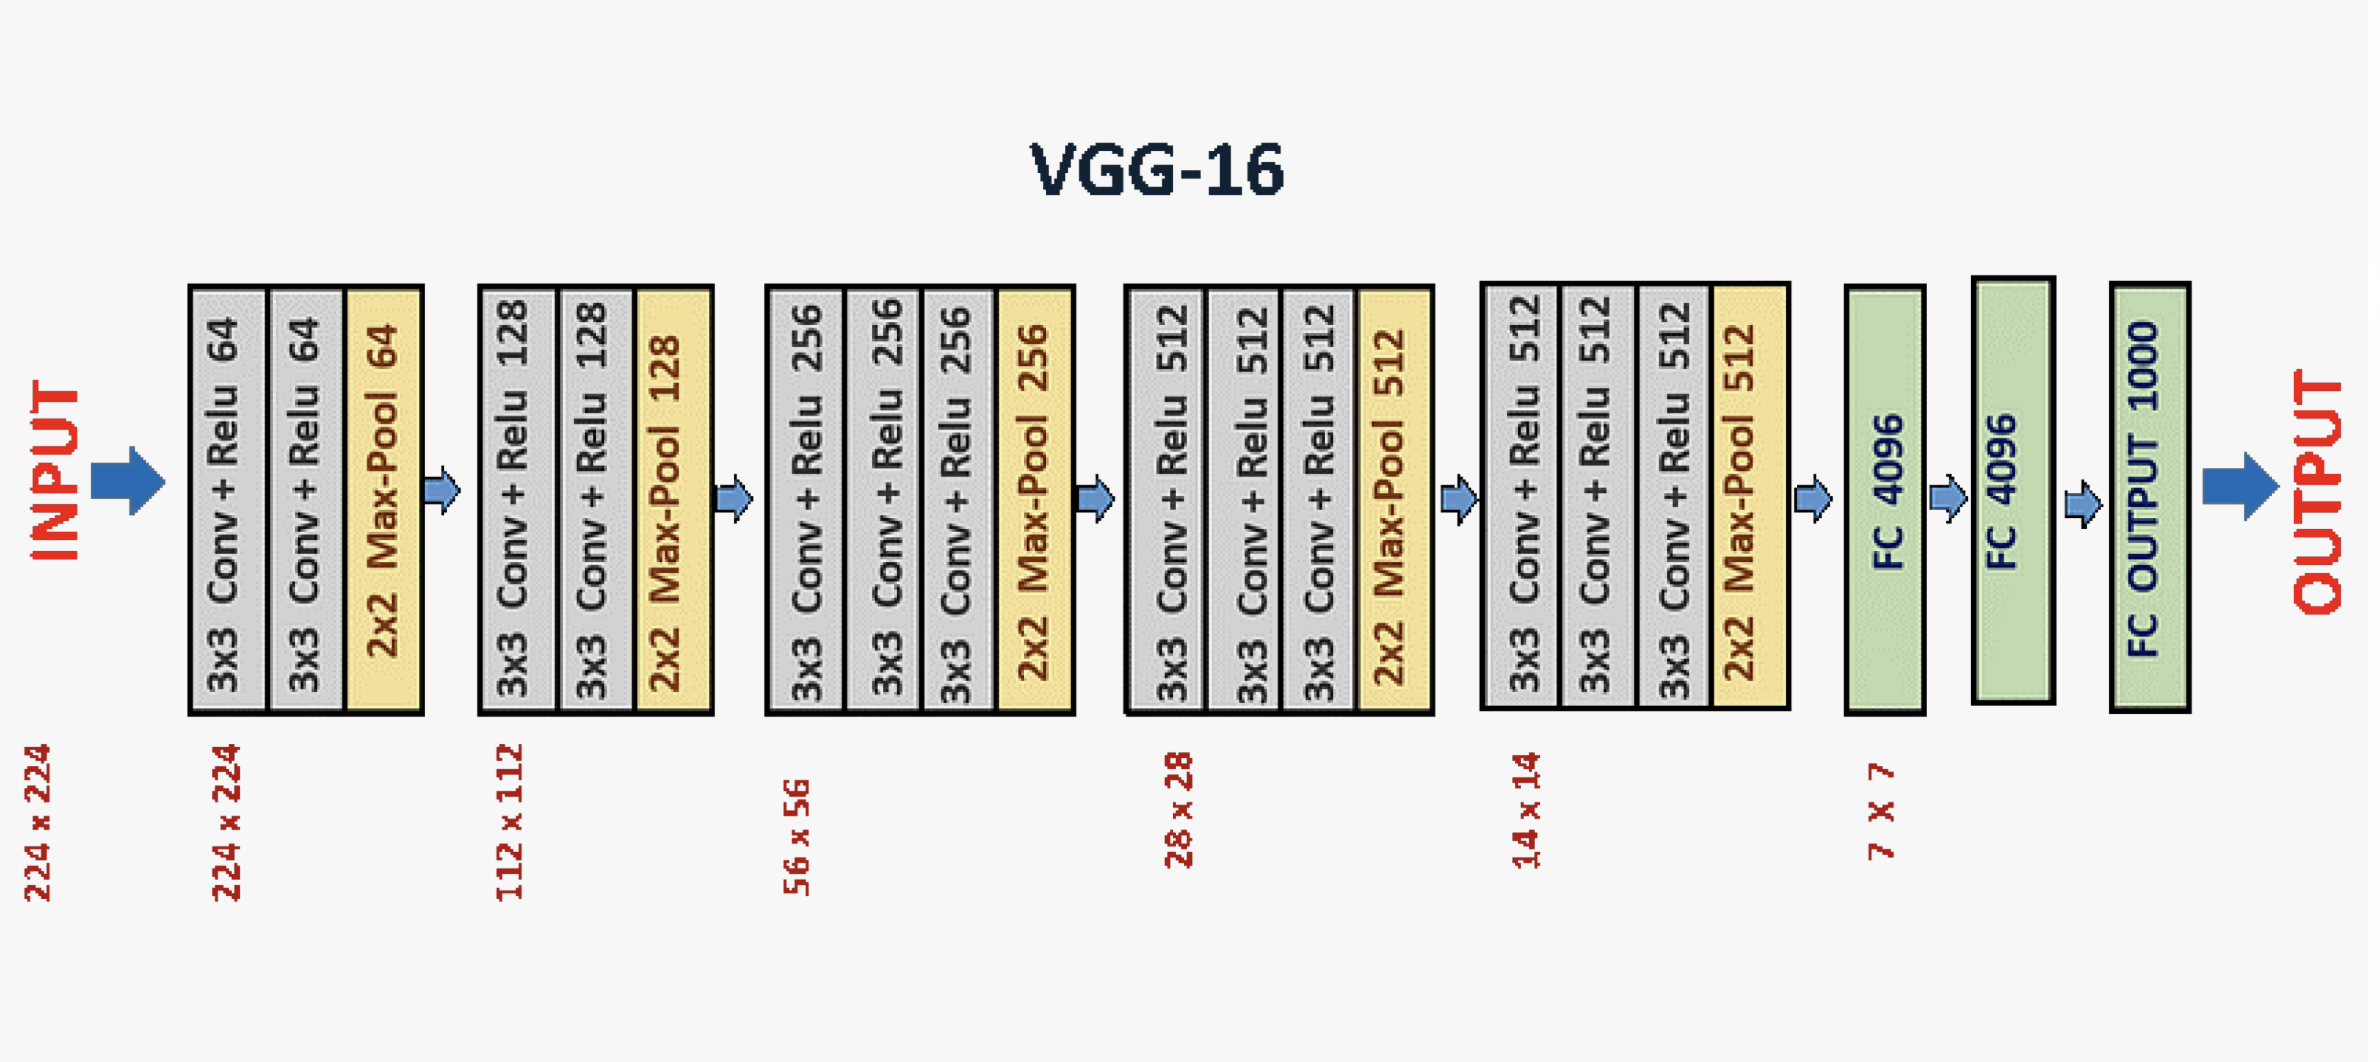

In [11]:

model = models.vgg16(weights='IMAGENET1K_V1')

# Выводим архитектуру
print(model)

# Подсчёт параметров
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Всего параметров: {total_params:,}")
print(f"Обучаемых параметров: {trainable_params:,}")


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

<p class="task" id="2"></p>

2\. Создайте датасет `CatBreeds` на основе данных из архива `cat_breeds_4.zip`. Разбейте датасет на обучающее и тестовое множество в соотношении 80 на 20%. 

К обучающему датасету примените следующее преобразование: приведите картинки к размеру 256x256, затем обрежьте по центру с размером 224х224, затем переведите изображения в тензор и нормализуйте значения интенсивности пикселей (`mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`).

К тестовому датасету примените преобразование `VGG16_Weights.IMAGENET1K_V1.transforms`.

- [ ] Проверено на семинаре

In [14]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torchvision.models import VGG16_Weights
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
from torchvision.models import vgg16


In [ ]:
data_path = "data/cat_breeds_4"

train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406),
                         std=(0.229, 0.224, 0.225))
])

test_transform = VGG16_Weights.IMAGENET1K_V1.transforms()

full_dataset = ImageFolder(root=data_path, transform=train_transform)

train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_ds, test_ds = random_split(full_dataset, [train_size, test_size])

test_ds.dataset.transform = test_transform

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)

print("Train size:", len(train_ds))
print("Test size:", len(test_ds))
print("Классы:", full_dataset.classes)


Train size: 3200
Test size: 800
Классы: ['American Shorthair', 'Persian', 'Russian Blue', 'Tiger']


<p class="task" id="3"></p>

3\. Заморозьте все веса модели из предыдущего задания. Замените последний слой `Linear` классификатора на новый слой, соответствующий задаче. После изменения последнего слоя выведите на экран количество настраиваемых (`requires_grad==True`) параметров модели. Решите задачу, используя модель с замороженными весами и изменнным последним слоем. 

Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве. 

- [ ] Проверено на семинаре

Обучаемых параметров: 16,388
Эпоха 1: Train Loss=0.957, Train Acc=61.50%, Test Loss=0.748, Test Acc=74.12%
Эпоха 2: Train Loss=0.673, Train Acc=74.81%, Test Loss=0.649, Test Acc=75.62%
Эпоха 3: Train Loss=0.612, Train Acc=75.91%, Test Loss=0.610, Test Acc=75.88%
Эпоха 4: Train Loss=0.578, Train Acc=77.81%, Test Loss=0.591, Test Acc=77.00%
Эпоха 5: Train Loss=0.559, Train Acc=77.97%, Test Loss=0.578, Test Acc=77.12%


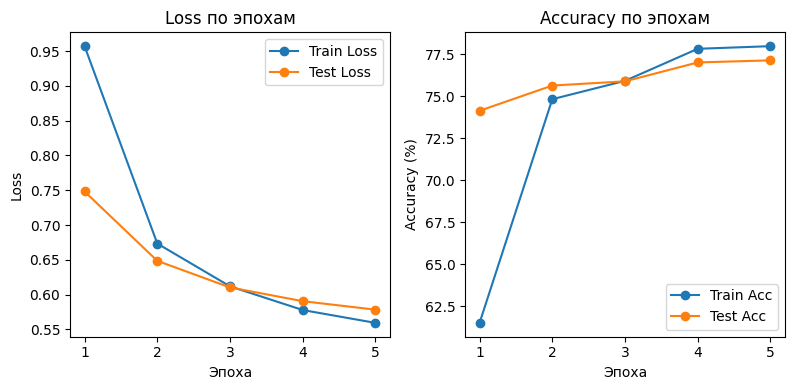

In [12]:
for param in model.parameters():
    param.requires_grad = False

num_features = model.classifier[-1].in_features
num_classes = len(full_dataset.classes)
model.classifier[-1] = nn.Linear(num_features, num_classes)

trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Обучаемых параметров: {trainable_params:,}")


criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.8)
optimizer = optim.AdamW(model.parameters(), lr=1e-4)

model = model.to(device)

epochs = 5
train_losses, test_losses, train_acc, test_acc = [], [], [], []

for epoch in range(epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    
    acc_train = 100. * correct / total
    train_losses.append(running_loss / len(train_loader))
    train_acc.append(acc_train)
    
    model.eval()
    test_running_loss, correct_test, total_test = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_running_loss += loss.item()
            
            _, predicted = outputs.max(1)
            total_test += labels.size(0)
            correct_test += predicted.eq(labels).sum().item()
    acc_test = 100. * correct_test / total_test
    test_losses.append(test_running_loss / len(test_loader))
    test_acc.append(acc_test)
    
    # вывод
    print(f"Эпоха {epoch+1}: Train Loss={train_losses[-1]:.3f}, Train Acc={acc_train:.2f}%, Test Loss={test_losses[-1]:.3f}, Test Acc={acc_test:.2f}%")


plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.plot(range(1, epochs+1), train_losses, marker='o', label="Train Loss")
plt.plot(range(1, epochs+1), test_losses, marker='o', label="Test Loss")
plt.title("Loss по эпохам")
plt.xlabel("Эпоха")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,3,2)
plt.plot(range(1, epochs+1), train_acc, marker='o', label="Train Acc")
plt.plot(range(1, epochs+1), test_acc, marker='o', label="Test Acc")
plt.title("Accuracy по эпохам")
plt.xlabel("Эпоха")
plt.ylabel("Accuracy (%)")
plt.legend()

plt.tight_layout()
plt.show()


<p class="task" id="4"></p>

4\. Повторите решение предыдущей задачи, заморозив все сверточные слои, кроме последнего (слои классификатора не замораживайте). Сравните качество полученного решения и решения из предыдущей задачи, а также время, затраченное на обучения моделей. Перед началом работы создайте модель заново.

- [ ] Проверено на семинаре

Обучаемых параметров: 123,642,856
Эпоха 1: Train Loss=1.399, Train Acc=63.41%, Test Loss=0.579, Test Acc=77.62%
Эпоха 2: Train Loss=0.404, Train Acc=83.94%, Test Loss=0.557, Test Acc=78.25%
Эпоха 3: Train Loss=0.213, Train Acc=92.03%, Test Loss=0.679, Test Acc=78.62%
Эпоха 4: Train Loss=0.124, Train Acc=95.38%, Test Loss=0.685, Test Acc=78.50%
Эпоха 5: Train Loss=0.048, Train Acc=98.41%, Test Loss=0.871, Test Acc=78.00%


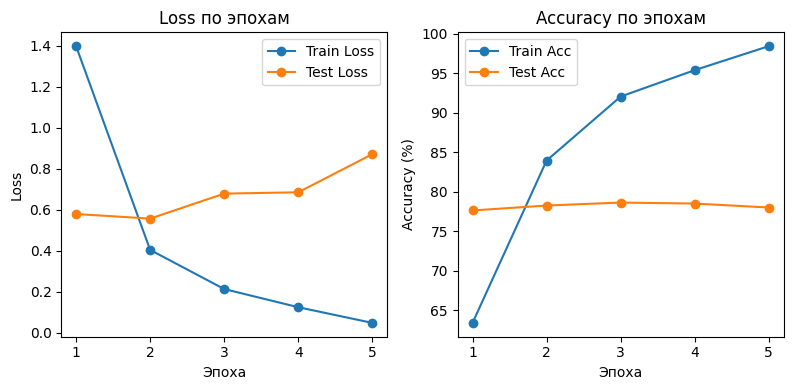

In [15]:
model2 = vgg16(weights='IMAGENET1K_V1')

# --- заморозим все сверточные слои кроме последнего ---
for param in model2.features.parameters():
    param.requires_grad = False
# последний сверточный блок оставляем обучаемым
for param in model2.features[-1].parameters():
    param.requires_grad = True

# классификатор не замораживаем
for param in model2.classifier.parameters():
    param.requires_grad = True


trainable_params = sum(p.numel() for p in model2.parameters() if p.requires_grad)
print(f"Обучаемых параметров: {trainable_params:,}")

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model2.parameters(), lr=1e-4)  # можно чуть меньше lr

model2 = model2.to(device)

epochs = 5
train_losses, test_losses, train_acc, test_acc = [], [], [], []

for epoch in range(epochs):
    model2.train()
    running_loss, correct, total = 0.0, 0, 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model2(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    
    acc_train = 100. * correct / total
    train_losses.append(running_loss / len(train_loader))
    train_acc.append(acc_train)
    
    model2.eval()
    test_running_loss, correct_test, total_test = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model2(images)
            loss = criterion(outputs, labels)
            test_running_loss += loss.item()
            
            _, predicted = outputs.max(1)
            total_test += labels.size(0)
            correct_test += predicted.eq(labels).sum().item()
    acc_test = 100. * correct_test / total_test
    test_losses.append(test_running_loss / len(test_loader))
    test_acc.append(acc_test)
    
    print(f"Эпоха {epoch+1}: Train Loss={train_losses[-1]:.3f}, Train Acc={acc_train:.2f}%, Test Loss={test_losses[-1]:.3f}, Test Acc={acc_test:.2f}%")

    
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.plot(range(1, epochs+1), train_losses, marker='o', label="Train Loss")
plt.plot(range(1, epochs+1), test_losses, marker='o', label="Test Loss")
plt.title("Loss по эпохам")
plt.xlabel("Эпоха")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,3,2)
plt.plot(range(1, epochs+1), train_acc, marker='o', label="Train Acc")
plt.plot(range(1, epochs+1), test_acc, marker='o', label="Test Acc")
plt.title("Accuracy по эпохам")
plt.xlabel("Эпоха")
plt.ylabel("Accuracy (%)")
plt.legend()

plt.tight_layout()
plt.show()


<p class="task" id="5"></p>

5\. Повторите решение задачи 3, расширив обучающий набор данных при помощи преобразований из `torchvision`, изменяющих изображение (повороты, изменение интенсивности пикселей, обрезание и т.д.). При оценке модели на тестовой выборке данные преобразования применяться не должны. Решение о том, сколько и каких слоев модели будет обучаться, примите самостоятельно. Перед началом работы создайте модель заново.

- [ ] Проверено на семинаре

Эпоха 1: Train Loss=1.037, Train Acc=64.94%, Test Loss=0.598, Test Acc=74.00%
Эпоха 2: Train Loss=0.698, Train Acc=78.34%, Test Loss=0.822, Test Acc=73.88%
Эпоха 3: Train Loss=0.575, Train Acc=82.41%, Test Loss=1.094, Test Acc=75.62%
Эпоха 4: Train Loss=0.512, Train Acc=86.94%, Test Loss=0.964, Test Acc=76.50%
Эпоха 5: Train Loss=0.500, Train Acc=89.56%, Test Loss=1.341, Test Acc=73.38%


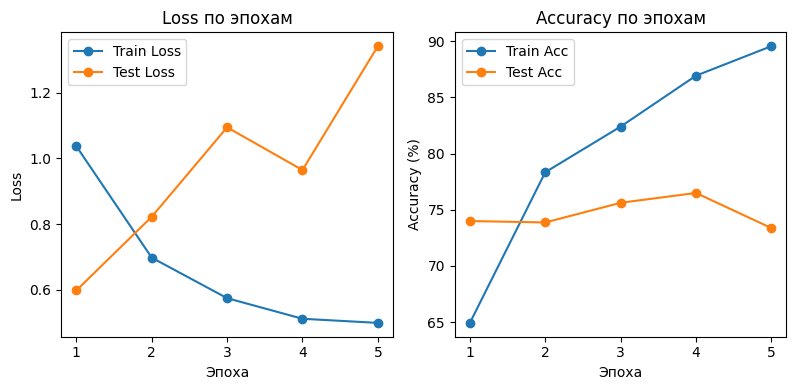

In [ ]:
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),             # уменьшаем все картинки до одного размера
    transforms.RandomResizedCrop(224),         # случайно вырезаем фрагмент и масштабируем его до 224x224
    transforms.RandomHorizontalFlip(),         # с вероятностью 50% отражаем картинку по горизонтали (зеркалим)
    transforms.RandomRotation(15),             # поворачиваем картинку на угол от -15 до +15 градусов
    transforms.ColorJitter(
        brightness=0.2,                        # случайно меняем яркость (на ±20%)
        contrast=0.2,                          # случайно меняем контрастность (на ±20%)
        saturation=0.2,                        # случайно меняем насыщенность цветов (на ±20%)
        hue=0.1                                # случайно меняем оттенок (цветовой тон) на ±0.1
    ),
    transforms.ToTensor(),                     # переводим в тензор PyTorch
    transforms.Normalize(                      # нормализация как в ImageNet
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225)
    )
])

# Трансформации для test — только базовые
test_transform = VGG16_Weights.IMAGENET1K_V1.transforms()

# Датасет
data_path = "data/cat_breeds_4"
full_dataset = ImageFolder(root=data_path, transform=train_transform)

train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_ds, test_ds = random_split(full_dataset, [train_size, test_size])

test_ds.dataset.transform = test_transform

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)


model = vgg16(weights=VGG16_Weights.IMAGENET1K_V1)

for param in model.parameters():
    param.requires_grad = False

num_features = model.classifier[-1].in_features
num_classes = len(full_dataset.classes)
model.classifier[-1] = nn.Linear(num_features, num_classes)

for param in model.classifier.parameters():
    param.requires_grad = True

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

model = model.to(device)

epochs = 5
train_losses, test_losses, train_acc, test_acc = [], [], [], []

for epoch in range(epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    
    acc_train = 100. * correct / total
    train_losses.append(running_loss / len(train_loader))
    train_acc.append(acc_train)
    
    model.eval()
    test_running_loss, correct_test, total_test = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_running_loss += loss.item()
            
            _, predicted = outputs.max(1)
            total_test += labels.size(0)
            correct_test += predicted.eq(labels).sum().item()
    acc_test = 100. * correct_test / total_test
    test_losses.append(test_running_loss / len(test_loader))
    test_acc.append(acc_test)
    
    print(f"Эпоха {epoch+1}: Train Loss={train_losses[-1]:.3f}, "
          f"Train Acc={acc_train:.2f}%, Test Loss={test_losses[-1]:.3f}, "
          f"Test Acc={acc_test:.2f}%")
    


plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.plot(range(1, epochs+1), train_losses, marker='o', label="Train Loss")
plt.plot(range(1, epochs+1), test_losses, marker='o', label="Test Loss")
plt.title("Loss по эпохам")
plt.xlabel("Эпоха")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,3,2)
plt.plot(range(1, epochs+1), train_acc, marker='o', label="Train Acc")
plt.plot(range(1, epochs+1), test_acc, marker='o', label="Test Acc")
plt.title("Accuracy по эпохам")
plt.xlabel("Эпоха")
plt.ylabel("Accuracy (%)")
plt.legend()

plt.tight_layout()
plt.show()

## Обратная связь
- [ ] Хочу получить обратную связь по решению

In [ ]:
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torchvision.models import VGG16_Weights

data_path = "data/cat_breeds_4"

train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomCrop(224, padding=8),       # мягкая обрезка с паддингом
    transforms.RandomHorizontalFlip(p=0.5),     # зеркалит только половину картинок
    transforms.RandomRotation(15),              # поворот до ±10 градусов
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406),
                         std=(0.229, 0.224, 0.225))
])

val_test_transform = VGG16_Weights.IMAGENET1K_V1.transforms()

full_dataset = ImageFolder(root=data_path, transform=train_transform)

train_size = int(0.7 * len(full_dataset))
val_size = int(0.15 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size
train_ds, val_ds, test_ds = random_split(full_dataset, [train_size, val_size, test_size])

val_ds.dataset.transform = val_test_transform
test_ds.dataset.transform = val_test_transform

from torch.utils.data import DataLoader
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)

print(len(train_ds), len(val_ds), len(test_ds))


2800 600 600


In [ ]:
model = vgg16(weights=VGG16_Weights.IMAGENET1K_V1)

for param in model.features.parameters():
    param.requires_grad = False
for param in model.features[-1].parameters():
    param.requires_grad = True
for param in model.classifier.parameters():
    param.requires_grad = True

num_features = model.classifier[-1].in_features
num_classes = len(full_dataset.classes)
model.classifier[-1] = nn.Linear(num_features, num_classes)

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.5, patience=2)


In [ ]:
train_losses, val_losses, train_acc, val_acc = [], [], [], []
epochs = 10

for epoch in range(epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    avg_train_loss = running_loss / len(train_loader)
    acc_train = 100. * correct / total
    
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    avg_val_loss = running_loss / len(val_loader)
    acc_val = 100. * correct / total
    
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_acc.append(acc_train)
    val_acc.append(acc_val)
    
    scheduler.step(avg_val_loss)
    
    print(f"Эпоха {epoch+1}: Train Loss={avg_train_loss:.3f}, Train Acc={acc_train:.2f}%, Val Loss={avg_val_loss:.3f}, Val Acc={acc_val:.2f}%")


Эпоха 1: Train Loss=0.680, Train Acc=72.36%, Val Loss=0.566, Val Acc=76.00%
Эпоха 2: Train Loss=0.335, Train Acc=87.39%, Val Loss=0.510, Val Acc=79.67%
Эпоха 3: Train Loss=0.147, Train Acc=94.82%, Val Loss=0.677, Val Acc=76.50%
Эпоха 4: Train Loss=0.065, Train Acc=97.43%, Val Loss=0.823, Val Acc=79.50%
Эпоха 5: Train Loss=0.046, Train Acc=98.36%, Val Loss=0.855, Val Acc=77.33%
Эпоха 6: Train Loss=0.016, Train Acc=99.57%, Val Loss=0.813, Val Acc=80.00%
Эпоха 7: Train Loss=0.010, Train Acc=99.68%, Val Loss=0.845, Val Acc=79.50%
Эпоха 8: Train Loss=0.006, Train Acc=99.82%, Val Loss=0.872, Val Acc=77.83%
Эпоха 9: Train Loss=0.002, Train Acc=100.00%, Val Loss=0.905, Val Acc=79.33%
Эпоха 10: Train Loss=0.002, Train Acc=99.96%, Val Loss=0.911, Val Acc=78.33%


In [20]:
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
test_accuracy = 100. * correct / total
print(f"Точность на тесте: {test_accuracy:.2f}%")


Точность на тесте: 81.83%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..2.1461596].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.0299783].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.4308496].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8610327..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..1.3584211].


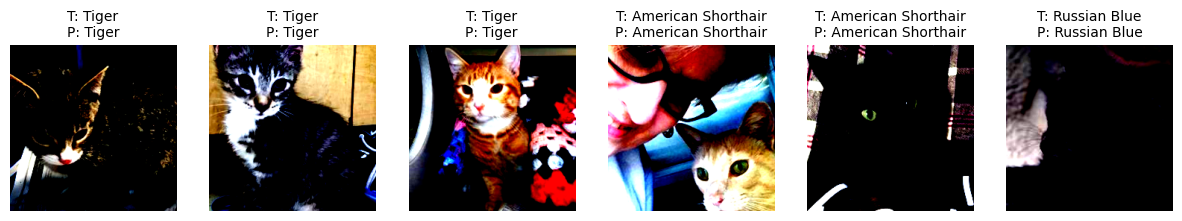

In [ ]:
import random


def show_examples(model, dataset, k=6, class_names=None, device="cpu"):
    model.eval()
    fig, axes = plt.subplots(1, k, figsize=(15, 3))
    
    for i in range(k):
        idx = random.randint(0, len(dataset)-1)
        image, label = dataset[idx]
        
        input_img = image.unsqueeze(0).to(device)
        
        with torch.no_grad():
            outputs = model(input_img)
            _, predicted = outputs.max(1)
        
        img = image.permute(1, 2, 0).numpy()  # C,H,W → H,W,C
        
        axes[i].imshow(img)
        axes[i].axis("off")
        
        true_class = class_names[label] if class_names else str(label)
        pred_class = class_names[predicted.item()] if class_names else str(predicted.item())
        axes[i].set_title(f"T: {true_class}\nP: {pred_class}", fontsize=10)
    
    plt.show()

show_examples(model, test_ds, k=6, class_names=full_dataset.classes, device=device)
